In [43]:
#https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/
#nb: minor data cleaning to remove csv formatting errors in original.
from pandas import Series
from pandas import DataFrame
import pandas
import numpy
print ("libraries loaded")

libraries loaded


In [41]:
# load dataset
series = Series.from_csv('seasonally_adjusted.csv', header=None)
print (type(series), series.shape)
print (series.head() )
print ("_________________________________")
# reframe as supervised learning
dataframe = DataFrame()
#create columns for multiple timeshifts.
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = series.shift(i)
    dataframe['t'] = series.values
print(dataframe.head(13))
dataframe = dataframe[13:]
print ("dataframe.count():", dataframe.count())
# save to new file
dataframe.to_csv('lags_12months_features.csv', index=False)

<class 'pandas.core.series.Series'> (96,)
1961-01-01     687.0
1961-02-01     646.0
1961-03-01    -189.0
1961-04-01    -611.0
1961-05-01    1339.0
dtype: float64
_________________________________
             t-12       t   t-11   t-10    t-9     t-8     t-7     t-6  \
1961-01-01    NaN   687.0    NaN    NaN    NaN     NaN     NaN     NaN   
1961-02-01    NaN   646.0    NaN    NaN    NaN     NaN     NaN     NaN   
1961-03-01    NaN  -189.0    NaN    NaN    NaN     NaN     NaN     NaN   
1961-04-01    NaN  -611.0    NaN    NaN    NaN     NaN     NaN     NaN   
1961-05-01    NaN  1339.0    NaN    NaN    NaN     NaN     NaN     NaN   
1961-06-01    NaN    30.0    NaN    NaN    NaN     NaN     NaN     NaN   
1961-07-01    NaN  1645.0    NaN    NaN    NaN     NaN     NaN   687.0   
1961-08-01    NaN  -276.0    NaN    NaN    NaN     NaN   687.0   646.0   
1961-09-01    NaN   561.0    NaN    NaN    NaN   687.0   646.0  -189.0   
1961-10-01    NaN   470.0    NaN    NaN  687.0   646.0  -189.0  

In [17]:
print (dataframe.count())
print (dataframe.shape)
#print (dataframe.isnull() )
print (dataframe['t'][dataframe['t'].isnull()] )

t-12    83
t       83
t-11    83
t-10    83
t-9     83
t-8     83
t-7     83
t-6     83
t-5     83
t-4     83
t-3     83
t-2     83
t-1     83
dtype: int64
(83, 13)
Series([], Name: t, dtype: float64)


(83, 13)
X.shape: (83, 12)
y.shape: (83,)
model.feature_importances_: [ 0.05576947  0.11611643  0.09068402  0.05570585  0.07793815  0.08377444
  0.08702181  0.0587311   0.10969621  0.05737765  0.14253953  0.06464534]


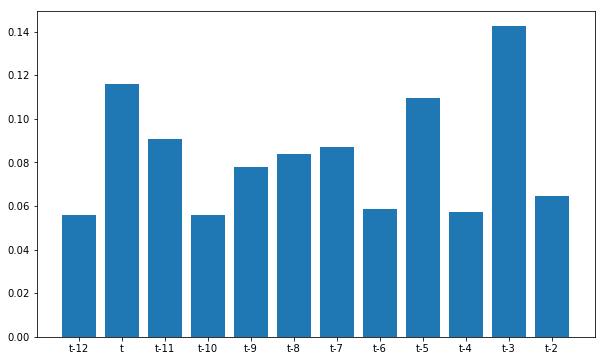

In [23]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
print (dataframe.shape)
#convert dataframe to array for ease of manipulation
array = dataframe.values
# split into input and output
X = array[:,0:-1]#select all columns except last column, reverse order of columns
y = array[:,-1]#select last column only.
print ("X.shape:", X.shape)
print ("y.shape:", y.shape)
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print("model.feature_importances_:", model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

In [55]:
print (type(model.feature_importances_), model.feature_importances_.shape)
type(model)
temp = pandas.Series(model.feature_importances_)
names = pandas.Series(names)
print (type(temp), temp.shape)
print (type(names), names.shape)
namesFeatureImportances = pandas.concat([names, temp], axis=1)
namesFeatureImportances.columns = ['names', 'importance']
print (type(namesFeatureImportances), namesFeatureImportances.shape, list(namesFeatureImportances))
namesFeatureImportances = namesFeatureImportances.sort_values(['importance'], ascending=[False])
print ("after sorting")
print (namesFeatureImportances)
#NB: odd result, t-11 has higher importance than t-7 here, but when RFE used (below) t-11 is ranked behind t-7. 

<class 'numpy.ndarray'> (12,)
<class 'pandas.core.series.Series'> (12,)
<class 'pandas.core.series.Series'> (12,)
<class 'pandas.core.frame.DataFrame'> (12, 2) ['names', 'importance']
   names  importance
0   t-12    0.055769
1      t    0.116116
2   t-11    0.090684
3   t-10    0.055706
4    t-9    0.077938
5    t-8    0.083774
6    t-7    0.087022
7    t-6    0.058731
8    t-5    0.109696
9    t-4    0.057378
10   t-3    0.142540
11   t-2    0.064645
after sorting
   names  importance
10   t-3    0.142540
1      t    0.116116
8    t-5    0.109696
2   t-11    0.090684
6    t-7    0.087022
5    t-8    0.083774
4    t-9    0.077938
11   t-2    0.064645
7    t-6    0.058731
9    t-4    0.057378
0   t-12    0.055769
3   t-10    0.055706


type(rfe): <class 'sklearn.feature_selection.rfe.RFE'>
type(fit): <class 'sklearn.feature_selection.rfe.RFE'>
Selected Features:
type(names): <class 'numpy.ndarray'> (12,)
['t-12' 't' 't-11' 't-10' 't-9' 't-8' 't-7' 't-6' 't-5' 't-4' 't-3' 't-2']
t True
t-7 True
t-5 True
t-3 True


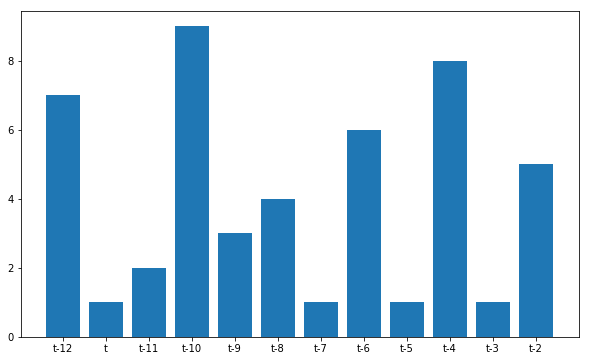

In [30]:
from sklearn.feature_selection import RFE
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
#http://scikit-learn.org/stable/modules/feature_selection.html#rfe

# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
print ("type(rfe):", type(rfe))
fit = rfe.fit(X, y)
print ("type(fit):", type(fit))
# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
print ("type(names):", type(names), names.shape)
print (names)

for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i], fit.support_[i])
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()
#NB: fit ranking: 1 = best, ranked first.